Importe os dados do ENEM 2015 (estado de SP)

In [1]:
import pandas as pd
df = pd.read_csv("C:/Users/Mariana/Dropbox (Pessoal)/1º sem 2020/MBA/Dados/Dados_ENEM.csv", encoding= 'unicode_escape')

Imprima as primeiras 5 linhas do conjunto de dados.
Linhas representam unidades amostrais (objetos ou "samples", conforme nomenclatura dos cientistas da computação)

In [4]:
df.head(5)

,Ordem,UF,Municipio,Cidade,Admin,Escola,N_alunos,N_participantes,P_Participantes,NSE,NSE.1,Nivel_Docente,Media_30melhores,Media
0,1,SP,SAO PAULO,capital,Privada,OBJETIVO COLEGIO INTEGRADO,44,44,100.00,Muito Alto,Alto ou Muito Alto,67.0,680.06,658.29
1,2,SP,SAO PAULO,capital,Privada,VERTICE COLEGIO UNIDADE II,77,69,89.61,Muito Alto,Alto ou Muito Alto,68.1,677.07,649.81
2,3,SP,SAO CAETANO DO SUL,interior,Privada,VILLARE COLEGIO,16,16,100.00,Muito Alto,Alto ou Muito Alto,64.0,NaN,638.54
3,4,SP,SAO PAULO,capital,Privada,BANDEIRANTES COLEGIO EFM,526,440,83.65,Muito Alto,Alto ou Muito Alto,49.6,719.28,637.29
4,5,SP,SAO PAULO,capital,Privada,MOBILE COLEGIO,127,113,88.98,Muito Alto,Alto ou Muito Alto,55.3,679.21,636.83


Verifique quais os tipos de variáveis que temos no conjunto de dados

In [9]:
df.dtypes

Ordem                 int64
UF                   object
Municipio            object
Cidade               object
Admin                object
Escola               object
N_alunos              int64
N_participantes       int64
P_Participantes     float64
NSE                  object
NSE.1                object
Nivel_Docente       float64
Media_30melhores    float64
Media               float64
dtype: object

Calculando algumas medidas descritivas das variáveis quantitativas

In [3]:
df.describe()

,Ordem,N_alunos,N_participantes,P_Participantes,Nivel_Docente,Media_30melhores,Media
count,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,1596.000000,2901.000000
mean,1451.000000,71.487418,50.116856,74.692344,60.031437,570.831635,527.602899
std,837.590891,74.486501,49.998143,15.185307,12.964371,43.365687,38.058296
min,1.000000,10.000000,5.000000,50.000000,7.100000,445.540000,415.670000
25%,726.000000,24.000000,19.000000,60.240000,51.400000,541.680000,498.270000
50%,1451.000000,45.000000,33.000000,76.190000,60.300000,570.650000,528.340000
75%,2176.000000,92.000000,64.000000,88.240000,69.000000,598.187500,555.700000
max,2901.000000,761.000000,526.000000,100.000000,100.000000,719.280000,658.290000


Calculando quantos alunos participaram da prova

In [37]:
df["N_participantes"].sum()

145389

In [ ]:
Construindo o histograma de Média das escolas

Text(0, 0.5, 'frequência')

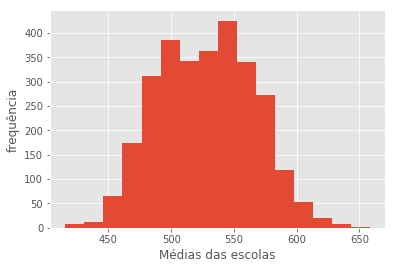

In [21]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.hist(df["Media"], bins = 16)
plt.xlabel("Médias das escolas")
plt.ylabel("frequência")

In [21]:
df['Fx_Media'] = pd.cut(df['Media'], bins=16)
c = df["Fx_Media"].value_counts(sort=False)
p = df["Fx_Media"].value_counts(normalize=True,sort=False).round(4) * 100
pd.concat([c,p], axis=1, keys=['counts', '%'])

,counts,%
"(415.427, 430.834]",7,0.24
"(430.834, 445.998]",12,0.41
"(445.998, 461.161]",65,2.24
"(461.161, 476.325]",175,6.03
"(476.325, 491.489]",312,10.75
"(491.489, 506.653]",385,13.27
"(506.653, 521.816]",343,11.82
"(521.816, 536.98]",363,12.51
"(536.98, 552.144]",425,14.65
"(552.144, 567.308]",340,11.72


Construindo tabelas de frequências das variáveis qualitativas

In [20]:
df["Admin"].value_counts()

Privada     1816
Estadual    1085
Name: Admin, dtype: int64

Associação de variável qualitativa e quantitativa ## Inserir nome no eixo x (média das escolas) ##

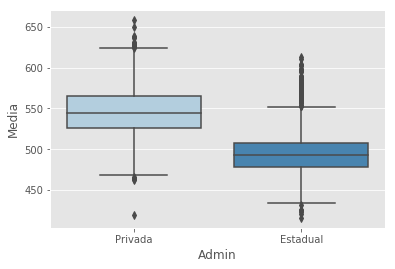

In [32]:
import seaborn as sns
sns.boxplot(y=df["Media"],x=df["Admin"], palette="Blues")

In [28]:
df.pivot_table(index="Admin",values="Media",aggfunc=("count","mean","std"))

,count,mean,std
Admin,,,
Estadual,1085,497.072295,30.741766
Privada,1816,545.843926,29.321273


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000754DB23630>,
      dtype=object)

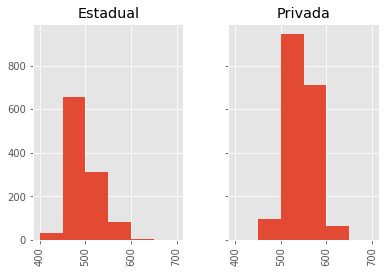

In [34]:
df['Media'].hist(by=df['Admin'],bins = [400,450,500,550,600,650,700],sharey=True)

Outra forma:

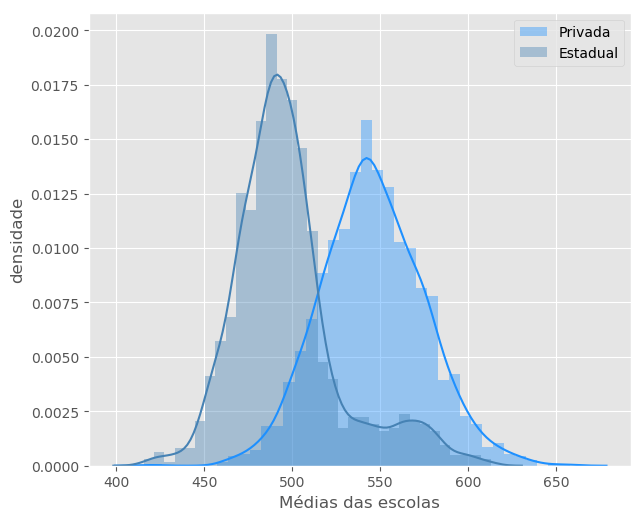

In [45]:
import seaborn as sns
plt.subplots(figsize=(7,6), dpi=100)
sns.distplot( df.loc[df.Admin=='Privada', "Media"] , color="dodgerblue", label="Privada")
sns.distplot( df.loc[df.Admin=='Estadual', "Media"] , color="steelblue", label="Estadual")

plt.xlabel("Médias das escolas")
plt.ylabel("densidade")
plt.legend();

In [36]:
t =  df[(df['Admin'] == 'Estadual')]
print(t[t.Media == t.Media.max()]) 

    Ordem  UF Municipio    Cidade     Admin            Escola  N_alunos  \
29     30  SP  SAO PAULO  capital  Estadual  SAO PAULO ETE DE       200   

    N_participantes  P_Participantes         NSE               NSE.1  \
29              181             90.5  Muito Alto  Alto ou Muito Alto   

    Nivel_Docente  Media_30melhores  Media  
29           61.8            666.81  613.3  


In [27]:
print(df[df.Media == df.Media.min()]) 

      Ordem  UF Municipio     Cidade     Admin           Escola  N_alunos  \
2900   2901  SP  MESOPOLIS  interior  Estadual  ADELINO BERTANI        22   

      N_participantes  P_Participantes    NSE                NSE.1  \
2900               14            63.64  Mdio  Mdio ou Mdio Alto   

      Nivel_Docente  Media_30melhores   Media  
2900           42.4               NaN  415.67  


In [87]:
df.pivot_table(index="Admin",columns="Cidade",values="Media",aggfunc=("count","mean","std"))

count                 mean                    std           
Cidade   capital interior     capital    interior    capital   interior
Admin                                                                  
Estadual     137      948  519.641898  493.810654  35.039084  28.655133
Privada      493     1323  547.337748  545.287271  30.575640  28.831987

Calculando medidas a partir do histograma

In [23]:
bins = [400,450,500,550,600,650,700]
df['Fx_Media'] = pd.cut(df['Media'], bins)
c = df["Fx_Media"].value_counts(sort=False)
p = df["Fx_Media"].value_counts(normalize=True,sort=False).round(4) * 100
pd.concat([c,p], axis=1, keys=['counts', '%'])

,counts,%
"(400, 450]",31,1.07
"(450, 500]",752,25.92
"(500, 550]",1258,43.36
"(550, 600]",789,27.20
"(600, 650]",70,2.41
"(650, 700]",1,0.03


Text(0, 0.5, 'frequência')

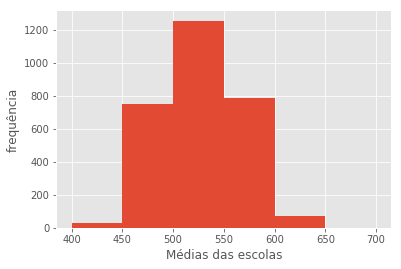

In [37]:
plt.style.use('ggplot')
plt.hist(df["Media"], bins = [400,450,500,550,600,650,700])
plt.xlabel("Médias das escolas")
plt.ylabel("frequência")

Construindo um histograma com classes de amplitudes diferentes

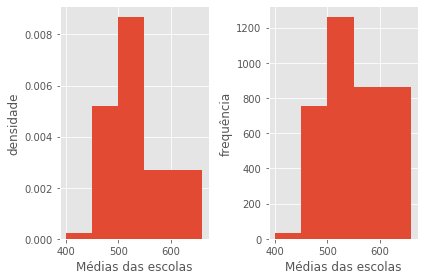

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.style.use('ggplot')
plt.hist(df["Media"], bins = [400,450,500,550,660], density=True)
plt.xlabel("Médias das escolas")
plt.ylabel("densidade")

plt.subplot(1, 2, 2)
plt.style.use('ggplot')
plt.hist(df["Media"], bins = [400,450,500,550,660])
plt.xlabel("Médias das escolas")
plt.ylabel("frequência")
plt.tight_layout()

Contruindo o histograma da variável Número de alunos

In [11]:
bins = [10,50,100,200,500,800]
group_names = [1,2,3,4,5]
df['Fx_Alunos'] = pd.cut(df['N_alunos'], bins, labels=group_names)
df["Fx_Alunos"].value_counts()

1    1546
2     664
3     495
4     146
5      13
Name: Fx_Alunos, dtype: int64

Text(0, 0.5, 'densidade')

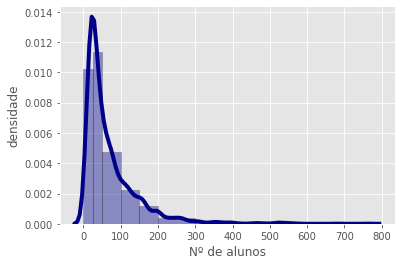

In [55]:
sns.distplot(df['N_alunos'], hist=True, kde=True, 
             bins=[0,25,50,100,150,200,300,400,500], color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xlabel("Nº de alunos")
plt.ylabel("densidade")

In [ ]:
Contruindo o histograma da variável Nível docente

Text(0, 0.5, 'densidade')

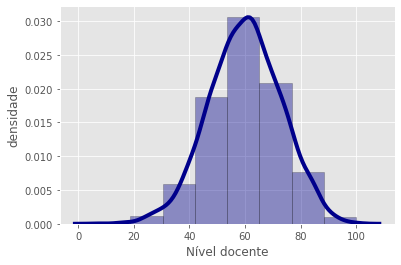

In [50]:
sns.distplot(df['Nivel_Docente'], hist=True, kde=True, 
             bins=8, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xlabel("Nível docente")
plt.ylabel("densidade")

Associação entre duas variáveis quantitativas

Text(0.5, 1.0, 'ENEM 2015')

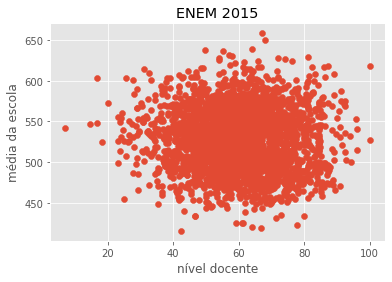

In [69]:
plt.scatter(x=df["Nivel_Docente"],y=df["Media"])
plt.xlabel("nível docente")
plt.ylabel("média da escola")
plt.title("ENEM 2015")

In [ ]:
Coeficiente de correlação de Pearson

In [2]:
df["Nivel_Docente"].corr(df["Media"])

-0.04165521174843278

Reta de regressão

In [62]:
from scipy import stats
stats.pearsonr(x=df["Nivel_Docente"],y=df["Media"])

(-0.04165521174843281, 0.02485844711117667)

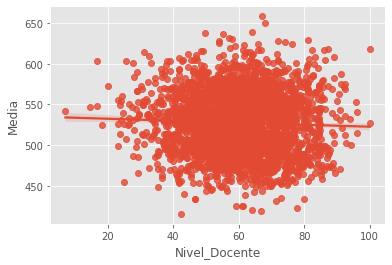

In [57]:
sns.regplot(x=df["Nivel_Docente"],y=df["Media"])